# Week Four Course Two
### Regression Analysis
   

In [2]:
# Starting up :
import os
print('Starting wd is :', os.getcwd())
os.chdir('C:\\Pydir\First')
print('Now the wd is :', os.getcwd())
wd = os.getcwd()

Starting wd is : C:\Users\mbric
Now the wd is : C:\Pydir\First


In [3]:
# What's inside my wd?
filelist = os.listdir()
print(filelist)

['df.csv', 'df_correct.csv', 'First.py', 'First_script.py', 'header.csv', 'header.txt', 'idle_one.py', 'imports-85.data', 'imports-85.names', 'Index']


In [4]:
# Import main packages for Data analysis 
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib as plt

In [5]:
# Import data
df = pd.read_csv('df.csv')
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [6]:
%%latex
Way to write in latex for the all cell???

<IPython.core.display.Latex object>

In [7]:
# Manage missing values : 

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

missing_data = df.isnull()
missing_data.head(5)

# Where are missing values?? 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

In [8]:
# Substitute all missing values

# For normalized-losses and other num variables (use mean)
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df['stroke'].astype('float').mean(axis = 0)
print ('avg-stroke :', avg_stroke)
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

# for categorical variables use mode:

df['num-of-doors'].value_counts()
print('The mode of num-of-doors is: ' ,df['num-of-doors'].value_counts().idxmax())
df["num-of-doors"].replace(np.nan, "four", inplace=True)

# Finally just drop the raws without missing 'price': 

df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

Average of normalized-losses: 122.0
Average of bore: 3.330710659898477
avg-stroke : 3.256903553299492
Average horsepower: 103.39698492462311
Average peak rpm: 5117.587939698493
The mode of num-of-doors is:  four


In [9]:
# Check  and adjust df variable types :
df.dtypes

# convert data to proper format: 

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [10]:
# Make new columns with different unit of measures: 

df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df['highway-mpg']
df.head()

# Normalise lenght, hight and width?
# Make some dummies ??

#dummy_variable_1 = pd.get_dummies(df["fuel-type"])
#dummy_variable_1.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


In [11]:
# Ok now lets save the dataframe

df.to_csv( 'C:\Pydir\First\df_correct.csv')

In [1]:
# Regression analysis 

# Import main packages for Data analysis 
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib as plt


# Linear regression model: import module from scikit-learn and create a regression object


from sklearn.linear_model import LinearRegression
lm = LinearRegression()

df = pd.read_csv('C:\Pydir\First\df_correct.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


In [2]:
# lets define an array Z of multiple pretictors

Z = df[['horsepower']] #'curb-weight','engine-size','highway-mpg'


# Attain parameters and prediction

lm.fit(Z, df['price'])
yhat = lm.predict(Z)
coef = lm.coef_
intec = lm.intercept_
print('The estimated reg fx is:', 'yhat = ', intec, '+', coef, '*horsepower')

The estimated reg fx is: yhat =  -4598.477803237689 + [172.20625117] *horsepower


highway-mpg      int64
price          float64
dtype: object


TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

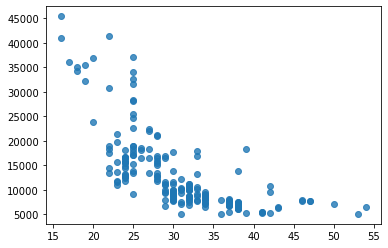

In [3]:
# Model evaluation using visualization 

import seaborn as sns

print(df[['highway-mpg', 'price']].dtypes)

sns.regplot(x= 'highway-mpg', y= 'price', data= df)
plt.ylim(0,)

# Also regression line of Spider 



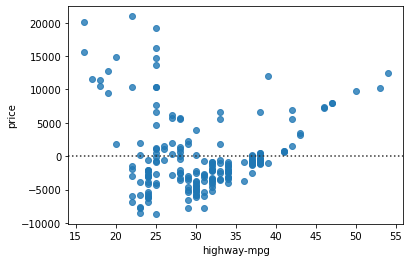

In [5]:
# Residual plot
sns.residplot(df['highway-mpg'], df['price'])

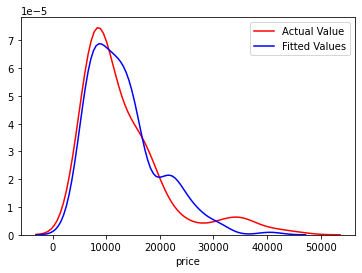

In [11]:
# Distribution Plot: check distrib of predicted (blue) vs observed (red)

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(yhat, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)


## Polinomial regresison: 
### The relationship between x and y always linear, but the  degree of the polinomial expression is higher than 1 

In [13]:
#e.g.: 

f = np.polyfit(x,y, 3)
p = np.poly1d(f)

# Numpy polyfit fuction can perform multidimentional polinomial linear regressions 

# use the preprocessing library in sklearn

from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2, include_bias = False)

pr.fit_transform([1,2], include_bias = false)

# Better if you standardise everything

from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()
SCALE.fit(x_data[['horsepower', 'highway-mpg']])
x_scale = SCALE.transform(x_data[['horsepower', 'highway-mpg']])

NameError: name 'x' is not defined

In [8]:
# Simplify the code using a Pipeline library

# import all modules you need 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [1]:
# import library pipeline

from sklearn.pipeline import Pipeline

# Create a list of tuples, fist element of each tuple contains the name of the estimator model
# the second element model constructor

#Input = [('scale',StandardScaler ),('polynomial', PolynomialFeatures(degree=2)),...,('mode', LinearRegression)]

# Input the list in the pipeline constructor and we create a pipeline object

#pipe = Pipeline(Input) 

# Train the pipeline by applying the method to the pipeline object

#pipe.fit(Z, y)

# and also produce a prediction

#yhat = pipe.predict(Z)


# In this case the method will first normalise the data, perform polinomial tranformation and then fit the regr model.

NameError: name 'Input' is not defined

# Week Five Course Two
### Model Evaluation and Refinements 

In [2]:
# In sample evaluation and model evaluation are different.
# Now we test model with value not included in the sample. 

# We want to split our model in two (70% vs 30%) 
# one part used to train our model and another to test it.

# Out of sample data to have an idea of how the model would perform in the real world

# Once completed our model testing we use all data to train it again

In [5]:
# Split data into random train and test subsets 

from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df['horsepower'], df['price'], test_size = 0.3, random_state = 0)

In [8]:
# Generalisation error is a measure of how well our data does at predicting previously unseen data.

# The error we obtain using our testing data is an approximation of this error.

### Cross-Validation : 

#### Dataset split into k equal groups (folds) some for testing and some for training.
#### We measure out of sample error for each combination of testinf and training folds
#### We use the average model evaluation scores (e.g., R^2) as an estimate of the out-of-sample error.

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [4]:
lr = LinearRegression()

scores = cross_val_score(lr, df['horsepower'], df['price'], cv = 3 )

np.mean(scores)

# We can also get the actual predicted values supplied by our model before the scores 
# (R^2 values) are calculated.

c:\users\mbric\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[123.         155.         155.         184.         184.
 175.          68.          68.          68.         102.
 116.          88.         145.         145.         145.
  88.          88.         116.         116.          69.
  55.          69.          69.          69.          69.
  69.          69.          69.          69.          97.
  97.         152.         152.         152.         160.
 200.         160.          97.          95.          97.
  95.          95.          95.          95.          95.
  97.          95.         142.          68.         102.
  68.          68.          68.          88.         145.
 143.         207.         207.         207.         1

nan

In [12]:
from sklearn.model_selection import cross_val_predict

In [13]:
yhat = cross_val_predict(lr, df['horsepower'], df['price'], cv = 3 )

NameError: name 'lr' is not defined

### Overfitting and polinomial regression:

#### Describes really good the data, but performs poorly at estimating the function

#### DIfference between training error (in-sample, always decreases with polinomial order) and the test error (out-of-sample)

#### We select the polinomial order to minimises the test error

In [10]:
# Calculate different R^2 depending on the order of pol we choose as follows: 

Rsqu_test = []
order = [1,2,3,4]

for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train)  # our x is only 'horsepower'
    x_test_pr = pr.fit_transform(x_test)
    lr.fit(x_train_pr, x_test_pr)
    Rsqu_test.append(lr.score(x_train_pr, x_test_pr))

ValueError: Expected 2D array, got 1D array instead:
array=[ 97.          85.          70.          70.          69.
 101.         116.          68.          69.          94.
  69.          82.         160.          82.          69.
  95.         182.          88.         111.         110.
 262.          82.         114.          95.         120.
 154.          84.          73.         134.          90.
 101.         162.          68.         160.          52.
 161.         103.39698492  69.          97.          70.
 114.          68.         111.          69.          95.
  69.         123.         116.         100.         155.
  68.          68.         116.         121.         112.
  68.          90.          73.          68.         182.
  88.          97.         101.         152.         102.
 102.         102.         116.         106.         110.
 155.         116.         145.          56.          92.
  70.          69.         114.         121.          68.
 200.          76.          84.         123.         111.
  88.         112.          78.          95.         160.
  92.          48.          86.         160.         101.
  70.         110.          76.         145.         142.
  62.          60.         116.         103.39698492 156.
  76.          82.          92.          62.          58.
 152.          88.         145.          68.          62.
 114.         175.         116.          68.         116.
 145.          68.         161.         114.          86.
  84.          82.          69.         184.          55.
  86.          68.         101.         160.         162.
 123.         114.          68.          68.          92.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Ridge regression against overfitting 


A matter of outliers, and the magnitude of high level polinomial coeff
The Ridge regression reduces magnitute of these coef, introducing the par alpha
Alpha multiplies all parameters of the polinomial function adjusting param and reducing overfitting. We use cross-valid to decide the best alpha.

In [12]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X, y)
Yhat = ridge_model.predict(X)

NameError: name 'X' is not defined

### Grid Search

Takes the model object you want to train and different values of hyperparameters 
(such as alpha) and  apply cross-validation (we use validation data to choose alpha).

We split our data in three parts: Trainin Set, Validation Set and Test Set.
Check scikit-learn website to check Ridge and GridSearchCV functions.

In [ ]:
# How to do a gridsearch to test very quickly multiple parameters

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Gridsearch needs a list with a dictionary of different parameters to put in ridge.

parameters1 = [{'alpha' : [0.0001, 0.1, 1,10,100,1000, 10000, 100000, 1000000]}]
RR = Ridge()

Grid1 = GridSearchCV(RR, parameters1, cv = 4)

Grid1.fit(x_data, y_data)
Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']

Ridge regression has also the option of normalising the data just change the parameters to give to the ridge funciton.

In [14]:
parameters2 = [{'alpha' : [0.0001, 0.1, 1,10,100,1000], 'normalize' : [True, False]}]

# In this way we will not only check the score of a ridge regression with different alphas
# but also when data is normalised or not.

In [ ]:
# Print out the scores for different parameter values: 

from param, mean_val, mean_test in zip(scores['params'], \n
                      scores['mean_test_score'], scores['mean_train_scores']):
    print(param, 'R^2 on test data:', mean_val, 'R^2 on train data:', mean_test)
    
    